## Artificial Intelligence (BSc) SA 2023-2024

- Prof. Luca Gambardella
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>

---

## Second Lab

What we are going to do today:
- Recap of the previous Lab
- Define the nearest neighbor method and use it
- Define the Best Nearest Neighbors and use it 
- Define the Multi Fragment and use it
- Define the Clarke-Wright and use it
- Finally compare these Constructive Methods

This cell below is simply importing some useful stuff for later

In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt

from time import time as t

## Recap
### The problems
As we saw last time, we have 12 problems and two have an optimal solution

In [2]:
# read all the files that has extention .tsp to the problems array object
problems = glob.glob('./problems/*.tsp')
for prob in problems:
    if prob in ["./problems/eil76.tsp", "./problems/kroA100.tsp"]:
        print(f"- {prob[11:]} with opt", sep='\t')
    else:
        print(f"- {prob[11:]}", sep='\t')

- fl1577.tsp
- lin318.tsp
- kroA100.tsp with opt
- d198.tsp
- pr439.tsp
- rat783.tsp
- eil76.tsp with opt
- u1060.tsp
- ch130.tsp
- pcb442.tsp


#### ProblemInstance Class
Last time we implemented an ProblemInstance class that we can use to load a problem. 

In [3]:
# import the functions we implemented in lab1
from utils import ProblemInstance, SolverTSP, random_method


#############################

name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


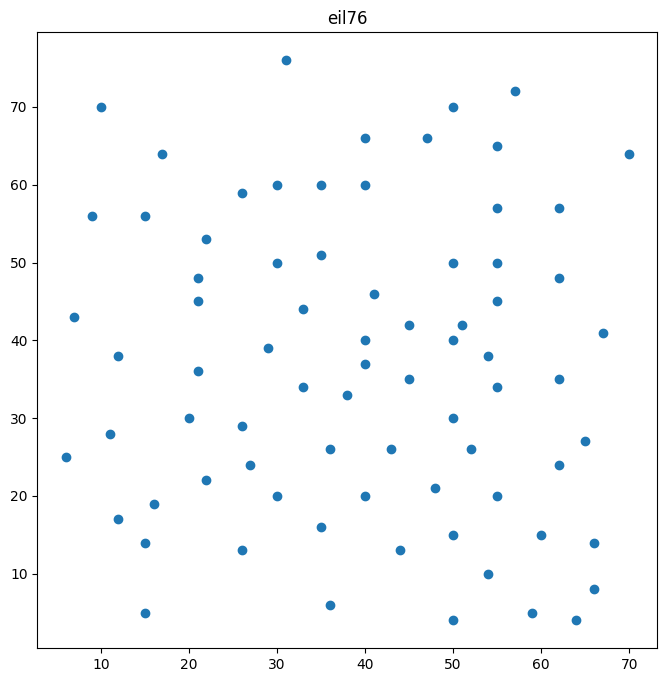

[[ 0. 15. 23. ... 18. 23. 25.]
 [15.  0. 24. ...  7. 12. 15.]
 [23. 24.  0. ... 31. 21. 20.]
 ...
 [18.  7. 31. ...  0. 17. 20.]
 [23. 12. 21. ... 17.  0.  3.]
 [25. 15. 20. ... 20.  3.  0.]]


In [4]:
# example of loading a problem instance
example_problem = "./problems/eil76.tsp"

# create the instance
p_inst = ProblemInstance(example_problem)

# call the implemented methods inside the instance
# print informations about the problem instance
p_inst.print_info()

# plot the instance data points
p_inst.plot_data()

# print the distance matrix computed inside the problem instance
print(p_inst.dist_matrix)

### TSPSolver Class
Even here, instead of reimplementing the class everytime, we can import the one I prepared before.
This implementation is ready to receive a lot of different types of problems

The class implements the following methods:
...

###  solving with random  ####
###  solved  ####


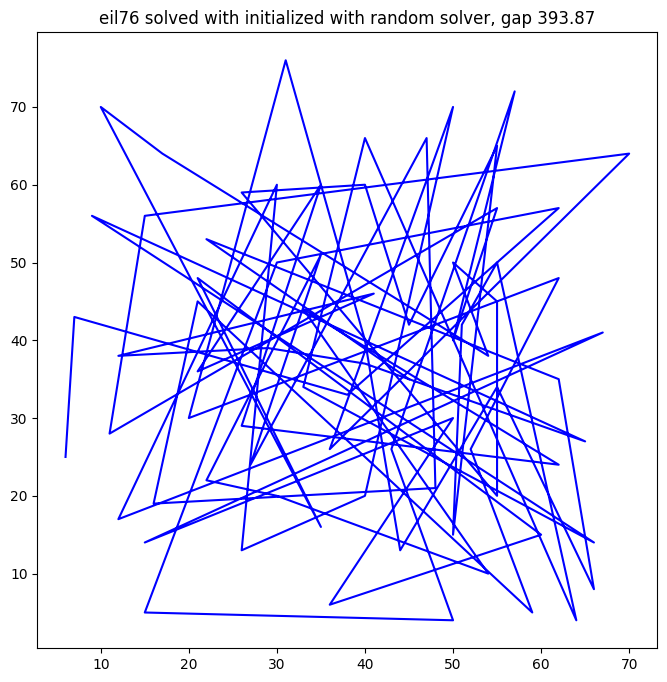

best solution with len 2657.0 
with a total time of 0.0014 seconds


In [5]:
# dictionnary to map a method name to it's implemented function
# this will make it easier to call the corresplonding method inside the TSP solver
# example with random sovler
available_solvers = {"random": random_method}

solver = SolverTSP("random", p_inst, available_solvers)
# start the time counter
start = t()
solver.compute_solution(return_value=False, verbose=True)
# end time counter
end = t()
# plot the solution
solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")

### Let's analyse the performances of the random Method

We will run a number of trails on random solver and plot ther results for comparison purposes


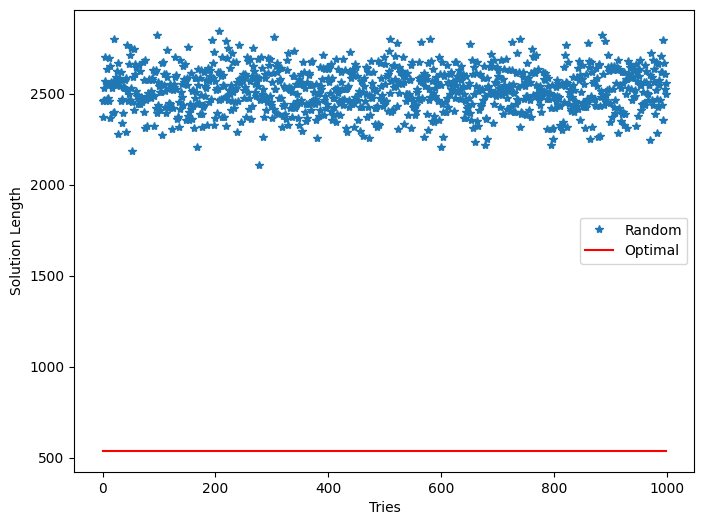

best solution 2108.0 on 1000 trials,
with a total time of 0.65 seconds


In [6]:
# number of random solver trials to be run
number_of_trials = 1000
# array to save the found lenghts by the random solver over the trials
found_lens = []
# starting time
start = t()
for _ in range(number_of_trials):
    # call the compute solution from TSPsolver
    solver.compute_solution(return_value=False, verbose=False)
    # save the lenght found and add it to the array
    found_lens.append(solver.found_length)
# end time    
end = t()
# plot all the found solutions in one plot
# initialize figure
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.ylabel("Solution Length")
plt.xlabel("Tries")
# plot the found lens
plt.plot(found_lens, "*",label="Random")
# plt a line for the optimal solution exisitng in the problem instance file
plt.plot(np.ones(number_of_trials)*p_inst.best_sol, "r-",label="Optimal")
plt.legend(loc="center right")
plt.show()
# best solution that have the minimum tour lenght
print(f"best solution {min(found_lens)} on {number_of_trials} trials,\nwith a total time of {np.round(end - start, 2)} seconds")

-------------
## Constructive Algorithm
### Nearest Neighbor Method

In [7]:
def nn( instance_, starting_node=0): 
    # TODO
    # have a copy of the distance matrix
    dist_matrix = np.copy(instance_.dist_matrix)
    # copy of number of points
    n = int(instance_.nPoints)
    # starting node id
    node = starting_node
    # add the starting node to the tour solution
    tour = [node]
    # Suggestion ^^^^
    # loop over the points of the instance
    # n - 1 because we already added the starting node
    for _ in range(n - 1):
        # new node insertion process
        # we need to insert the closest point from the distance matrix
        # the point should not be in the tour (every point in the tour should be visited only once)
        # sort the node by np.argsort from distance matrix
        for new_node in np.argsort(dist_matrix[node]):
              if new_node not in tour:
                    tour.append(new_node)
                    node = new_node
                    break
    # [...]
    return np.array(tour)

###  solving with nn  ####
###  solved  ####


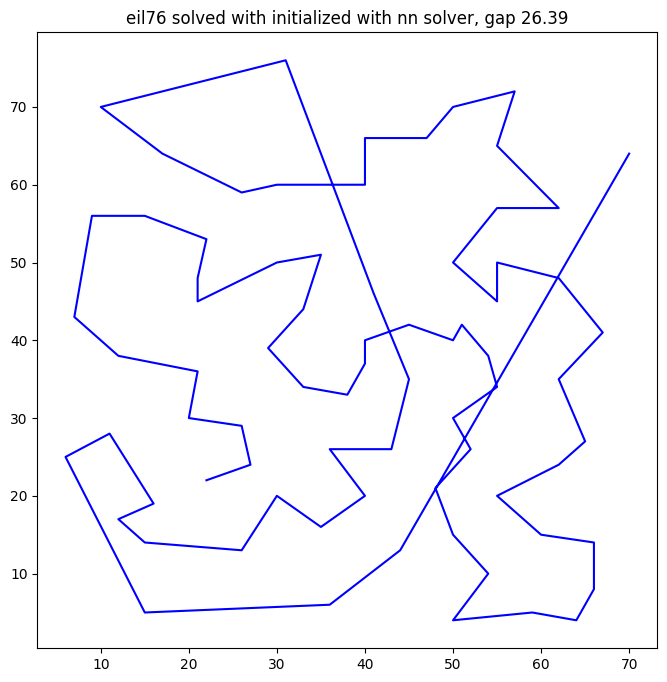

best solution with len 680.0 
with a total time of 0.00515 seconds


In [8]:
# add Nearest neighbor to the solvers
available_solvers = {"random": random_method,
                     "nn":nn}

# solve the p_instance with  'nn'
solver = SolverTSP("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
nn_len = solver.found_length
nn_time = np.round(end - start, 5)

## Compare the 1000 random solver to the solution of Nearest Neighbor

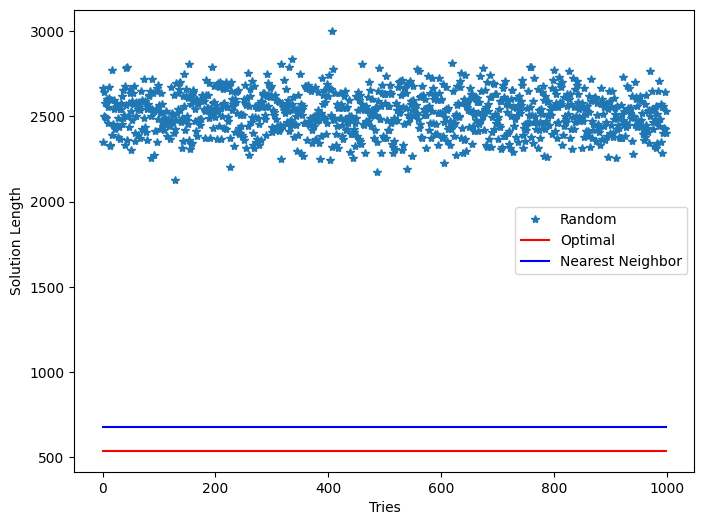

best solution found with random 2124.0 on 1000 trials,
with a total time of 0.65 seconds


solution found with nn 680.0,
with a total time of 0.00515 seconds


In [9]:
# compute the 1000 random trials
number_of_trials = 1000
found_lens = []
solver = SolverTSP("random", p_inst, available_solvers)
#start random computation
start = t()
for _ in range(number_of_trials):
    solver.compute_solution(return_value=False, verbose=False)
    found_lens.append(solver.found_length)
end = t()
# initialize figure
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.ylabel("Solution Length")
plt.xlabel("Tries")
# plot random found lenghts
plt.plot(found_lens, "*",label="Random")
# plot the optimal solution
plt.plot(np.ones(number_of_trials)*p_inst.best_sol, "r-",label="Optimal")
# plot the solution with Nearest neighbor
plt.plot(np.ones(number_of_trials)*nn_len, "b-",label="Nearest Neighbor")
plt.legend(loc="center right")
plt.show()

print(f"best solution found with random {min(found_lens)} on {number_of_trials} trials,\nwith a total time of {np.round(end - start, 2)} seconds\n\n")
print(f"solution found with nn {nn_len},\nwith a total time of {nn_time} seconds")

### Best Nearest Neighbors

In [10]:
# similar to NN, but change the starting node every time
# complexity: n-squared
def best_nn(instance):
    # TODO
    solutions, lens = [], []
    # loop over all nodes and compute the solution with a different starting node
    # save all the solutions
    for starting_node in range(instance.nPoints):
        # call the nn function
        new_solution = nn(instance, starting_node=starting_node)
        # save solutions
        solutions.append(new_solution)
        solver.solution = new_solution
        lens.append(solver.evaluate_solution(return_value=True))
    # return the best solution, with min tour lenght over all the 
    solution = solutions[np.argmin(lens)]
    # [...]
    return solution

###  solving with best_nn  ####
###  solved  ####


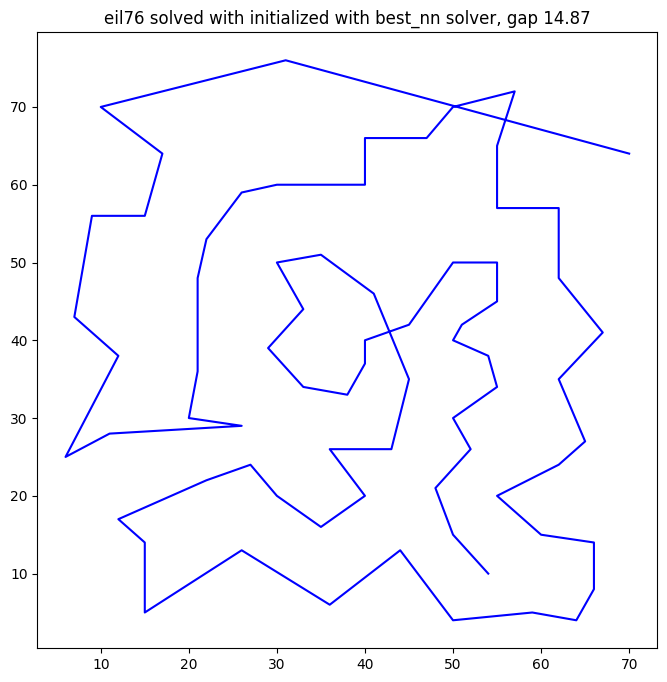

best solution with len 618.0 
with a total time of 0.0898 seconds


In [11]:
# add best nn to the solvers
available_solvers = {"random": random_method,
                     "nn": nn,
                     "best_nn":best_nn}

# try it
solver = SolverTSP("best_nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()
best_nn_len = solver.found_length
solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")

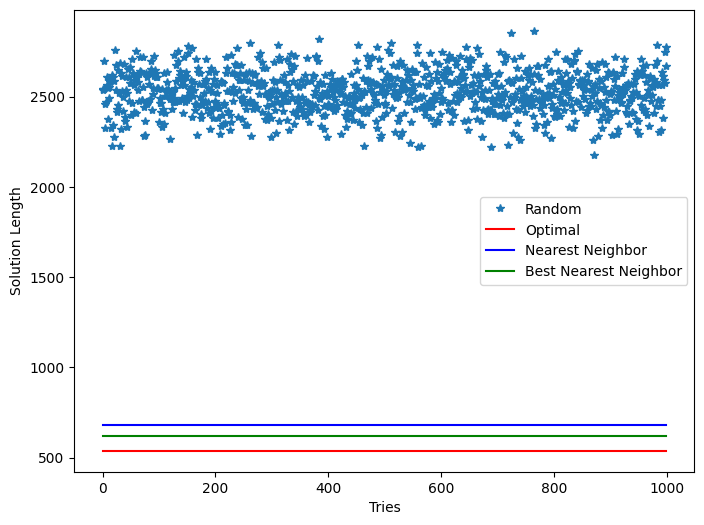

In [12]:
# compute the 1000 random trials
number_of_trials = 1000
found_lens = []
solver = SolverTSP("random", p_inst, available_solvers)
#start random computation
start = t()
for _ in range(number_of_trials):
    solver.compute_solution(return_value=False, verbose=False)
    found_lens.append(solver.found_length)
end = t()
# initialize figure
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.ylabel("Solution Length")
plt.xlabel("Tries")
# plot random found lenghts
plt.plot(found_lens, "*",label="Random")
# plot the optimal solution
plt.plot(np.ones(number_of_trials)*p_inst.best_sol, "r-",label="Optimal")
# plot the solution with Nearest neighbor
plt.plot(np.ones(number_of_trials)*nn_len, "b-",label="Nearest Neighbor")
# plot the solution with Best Nearest neighbor
plt.plot(np.ones(number_of_trials)*best_nn_len, "g-",label="Best Nearest Neighbor")
plt.legend(loc="center right")
plt.show()

### Multi Fragment

In [13]:
# solution example: {'0': [42, 21], '1': [29, 73], '2': [43, 39]}

# if n1-n2 can be established
# tsp tour should not have more than 2 connection for nodes
# 3-degree city not allowed
def check_if_available(n1, n2, sol):
    return (len(sol[str(n1)]) < 2) and (len(sol[str(n2)]) < 2)

# check for circuits
# should not form an inner loop
# start from the extremes and see if it ends (go to the end of partial solution that we have)
# if it does not for an inner loop -> it will be added
# if node with 0-connection -> you do not compute anything
# compute loop tracker only if both extremes of the inserting edge have at least one connection
def check_if_not_close(edge_to_append, sol):
    # edge to be added to the tour
    n1, n2 = edge_to_append
    from_city = n2
    # if node1 have 0-connection -> return true
    if len(sol[str(n1)]) == 0:
      return True
    # if node2 have 0-connection -> return true
    if len(sol[str(n2)]) == 0:
      return True
    
    # start with the current city
    # first edge coming from first node
    cur_city = sol[str(n1)][0]
    # array of nodes indices
    partial_tour = [n1, cur_city]
    while True:
      # if current city have degree of 2
      # a possible circuit is there, we need to check for circuits
      if len(sol[str(cur_city)]) == 2:
        # loop over the exisitng edges in the solution example
        # if it connect by any edges to node2, this means it forms an edge
        # so return False, we cannot add this edge because it creates a circuit,
        # else return True directly, it's not possible for a circuit

        # check for the cities connected to the current city
        for i in sol[str(cur_city)]:
          # if not in forming a circuit (not existing in the partial tour)
          if i not in partial_tour:
            cur_city = i
            partial_tour.append(cur_city)
            if cur_city == n2:
              return False
      else:
        return True

# Solve_Dict = {node_index[vertice_connection] for node_index in range(n) }
# simple transformation from dictionary of vertices until array of node indices
def create_solution(start_sol, sol, n):
    assert len(start_sol) == 2, "too many cities with just one link"
    end = False
    n1, n2 = start_sol
    from_city = n2
    sol_list = [n1, n2]
    while not end:
        for node_connected in sol[str(from_city)]:
            # print(node_connected, from_city)
            # print(sol_list)
            # print(sol)
            if node_connected not in sol_list:
                from_city = node_connected
                sol_list.append(node_connected)
            if len(sol_list) == n:
                end = True
    return sol_list


# complexity at most n-squared log n, with some tricks, because we are ot running the inner loop and check n squared time
# at each insertion we are having less edges to add
# total number of edges n squared/2, constraint can be applied by a constant
def mf(instance):
  # copy of the distance matrix
  mat = np.copy(instance.dist_matrix)
  print(mat)
  mat = np.triu(mat)
  print(mat)
  mat[mat == 0] = 100000
  num_cit = instance.dist_matrix.shape[0]
  print(num_cit)

  start_list = [i for i in range(num_cit)]

  solution = {str(i): [] for i in range(num_cit)}

  inside = 0
  # sort the matrice
  for el in np.argsort(mat.flatten()):
      # get shortest edges and get the nodes connecting it
      print('Shortest path:')
      print(el)
      node1, node2 = el // num_cit, el % num_cit
      print('Nodes:')
      print(node1, node2)

      # possible edge, we should check the constraints if we can add it or not
      possible_edge = [node1, node2]

      # we check if available (not 3-degree nodes for both nodes)
      if check_if_available(node1, node2, solution):
          print('Available not 3-degree')
          # we check if it does not form a circuit
          if check_if_not_close(possible_edge, solution):
              print('Not Circuit')
              # add the nodes to the tour solution
              solution[str(node1)].append(node2)
              solution[str(node2)].append(node1)
              # check if a node exist more than once, remove it
              if len(solution[str(node1)]) == 2:
                  start_list.remove(node1)
              if len(solution[str(node2)]) == 2:
                  start_list.remove(node2)
              inside += 1

              print(solution)
              # all edges are added, return solution
              if inside == num_cit - 1:
                  solution = create_solution(start_list, solution, num_cit)
                  return solution

###  solving with multi_fragment  ####
[[ 0. 15. 23. ... 18. 23. 25.]
 [15.  0. 24. ...  7. 12. 15.]
 [23. 24.  0. ... 31. 21. 20.]
 ...
 [18.  7. 31. ...  0. 17. 20.]
 [23. 12. 21. ... 17.  0.  3.]
 [25. 15. 20. ... 20.  3.  0.]]
[[ 0. 15. 23. ... 18. 23. 25.]
 [ 0.  0. 24. ...  7. 12. 15.]
 [ 0.  0.  0. ... 31. 21. 20.]
 ...
 [ 0.  0.  0. ...  0. 17. 20.]
 [ 0.  0.  0. ...  0.  0.  3.]
 [ 0.  0.  0. ...  0.  0.  0.]]
76
Shortest path:
2553
Nodes:
33 45
Available not 3-degree
Not Circuit
{'0': [], '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': [], '12': [], '13': [], '14': [], '15': [], '16': [], '17': [], '18': [], '19': [], '20': [], '21': [], '22': [], '23': [], '24': [], '25': [], '26': [], '27': [], '28': [], '29': [], '30': [], '31': [], '32': [], '33': [45], '34': [], '35': [], '36': [], '37': [], '38': [], '39': [], '40': [], '41': [], '42': [], '43': [], '44': [], '45': [33], '46': [], '47': [], '48': [], '49': [], '50': [], '

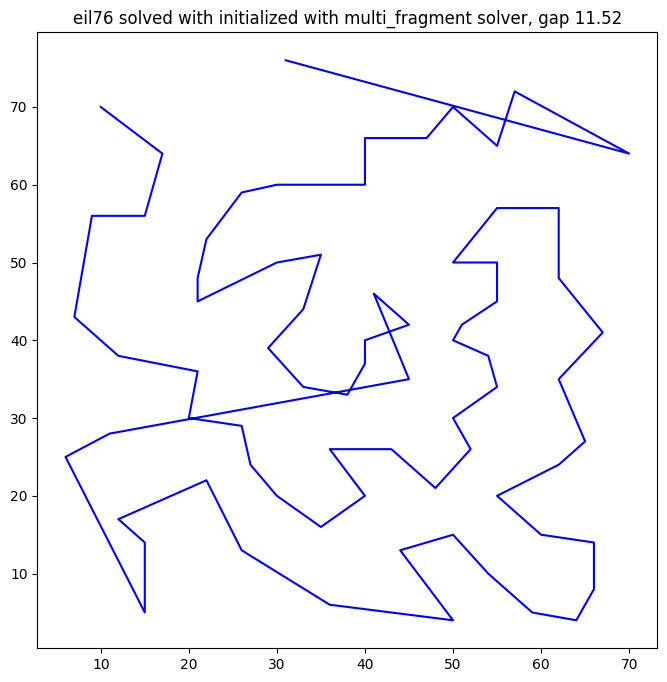

best solution with len 600.0 
with a total time of 0.05985 seconds


In [14]:
available_solvers = {"random": random_method,
                     "nn":nn,
                     "best_nn":best_nn,
                     "multi_fragment": mf
                    }

solver = SolverTSP("multi_fragment", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

mf_lenght = solver.found_length
solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")

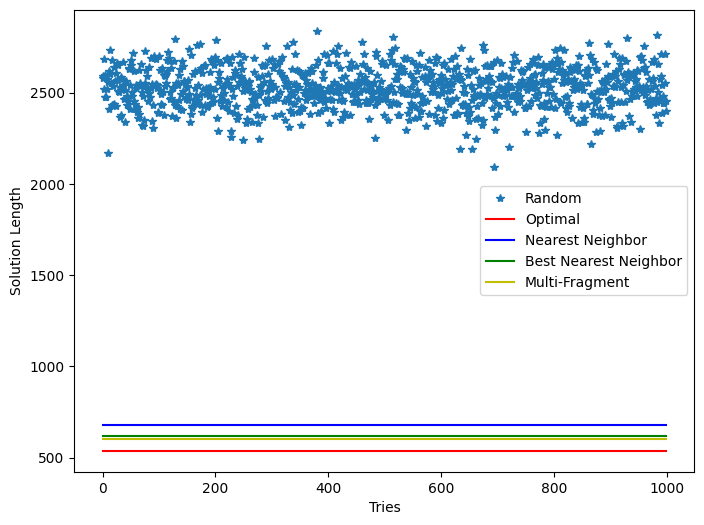

In [15]:
# compute the 1000 random trials
number_of_trials = 1000
found_lens = []
solver = SolverTSP("random", p_inst, available_solvers)
#start random computation
start = t()
for _ in range(number_of_trials):
    solver.compute_solution(return_value=False, verbose=False)
    found_lens.append(solver.found_length)
end = t()
# initialize figure
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.ylabel("Solution Length")
plt.xlabel("Tries")
# plot random found lenghts
plt.plot(found_lens, "*",label="Random")
# plot the optimal solution
plt.plot(np.ones(number_of_trials)*p_inst.best_sol, "r-",label="Optimal")
# plot the solution with Nearest neighbor
plt.plot(np.ones(number_of_trials)*nn_len, "b-",label="Nearest Neighbor")
# plot the solution with Best Nearest neighbor
plt.plot(np.ones(number_of_trials)*best_nn_len, "g-",label="Best Nearest Neighbor")
# multi fragment
plt.plot(np.ones(number_of_trials)*mf_lenght, "y-",label="Multi-Fragment")
plt.legend(loc="center right")
plt.show()

### Clarke-Wright 
Instead of sorting edges from shortest to longest -> Clarke-Wright

Sort based on saving


In [16]:
# free a hub from the list
# node_index[str(hub_node)] = []
def remove_hub(solution, hub_node):
    list_to_rem = solution[str(hub_node)]
    for node in list_to_rem:
        solution[str(node)].remove(hub_node)
    solution[str(hub_node)] = []
    return solution, len(list_to_rem)

# return nodes that still have a degree < 2
def get_free_nodes(solution):
    free = []
    for key in solution.keys():
        if len(solution[key]) < 2:
            free.append(int(key))
    return free

# find a node that have minimal distance
def find_hub(dist_matrix):
    return np.argmin(np.sum(dist_matrix, axis=0))

# compute saving for each pair of vertices
def compute_savings(dist_matrix, hub_node):
    n = dist_matrix.shape[0]
    A = np.tile(dist_matrix[hub_node], n).reshape((n, n))
    return A + np.transpose(A) - dist_matrix

# same logic as MF but here we compute based on the saving instead of the distance between the two edges
def cw(instance):
  inside = 0
  dist_matrix = instance.dist_matrix
  # find the node with minimal sum of distances to it's neighbors
  hub_node = find_hub(dist_matrix)
  # compute all the savings in saving matrix
  savings_mat = compute_savings(dist_matrix, hub_node)
  mat = np.triu(savings_mat, 1)
  num_cit = mat.shape[0]
  start_list = [i for i in range(num_cit)]
  solution = {str(i): [] for i in range(num_cit)}
  # same process and constraints as Multi-Fragment
  for el in np.argsort(mat.flatten())[::-1]:
      node1, node2 = el // num_cit, el % num_cit
      possible_edge = [node1, node2]
      if hub_node not in possible_edge:
          if check_if_available(node1, node2, solution):
              if check_if_not_close(possible_edge, solution):
                  solution[str(node1)].append(node2)
                  solution[str(node2)].append(node1)
                  if len(solution[str(node1)]) == 2:
                      start_list.remove(node1)
                  if len(solution[str(node2)]) == 2:
                      start_list.remove(node2)
                  inside += 1
                  if inside == num_cit - 2:
                      free_list = get_free_nodes(solution)
                      if hub_node in free_list:
                          free_list.remove(hub_node)
                      node1 = free_list[0]
                      node2 = free_list[1]
                      solution[str(hub_node)] = [node1]
                      solution[str(node1)].append(hub_node)
                      start_list.remove(node1)
                      solution_list = create_solution(start_list, solution, num_cit)
                      return solution_list

###  solving with clarke wright  ####
###  solved  ####


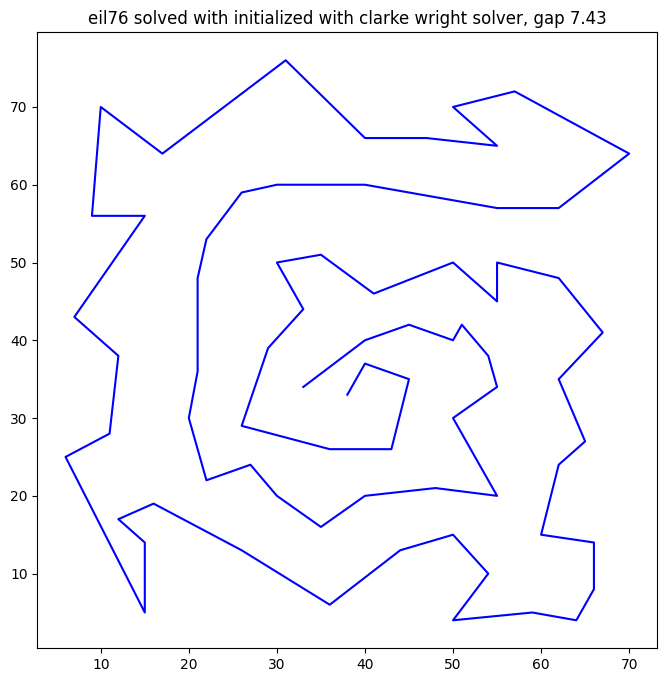

best solution with len 578.0 
with a total time of 0.01181 seconds


In [17]:
available_solvers = {"random": random_method,
                     "nn":nn,
                     "best_nn":best_nn,
                     "multi_fragment": mf,
                     "clarke wright": cw
                    }

solver = SolverTSP("clarke wright", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()
cw_sol = solver.found_length
solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")

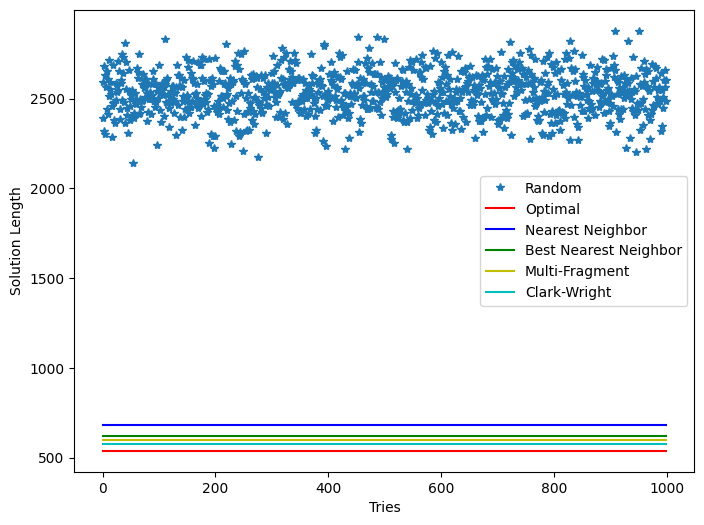

In [18]:
# compute the 1000 random trials
number_of_trials = 1000
found_lens = []
solver = SolverTSP("random", p_inst, available_solvers)
#start random computation
start = t()
for _ in range(number_of_trials):
    solver.compute_solution(return_value=False, verbose=False)
    found_lens.append(solver.found_length)
end = t()
# initialize figure
fig=plt.figure(figsize=(8,6), dpi= 100, facecolor='w', edgecolor='k')
plt.ylabel("Solution Length")
plt.xlabel("Tries")
# plot random found lenghts
plt.plot(found_lens, "*",label="Random")
# plot the optimal solution
plt.plot(np.ones(number_of_trials)*p_inst.best_sol, "r-",label="Optimal")
# plot the solution with Nearest neighbor
plt.plot(np.ones(number_of_trials)*nn_len, "b-",label="Nearest Neighbor")
# plot the solution with Best Nearest neighbor
plt.plot(np.ones(number_of_trials)*best_nn_len, "g-",label="Best Nearest Neighbor")
# multi fragment
plt.plot(np.ones(number_of_trials)*mf_lenght, "y-",label="Multi-Fragment")
# CW
plt.plot(np.ones(number_of_trials)*cw_sol, "c-",label="Clark-Wright")
plt.legend(loc="center right")
plt.show()

### Comparison Constructive methods

In [19]:
from time import time as t
import pandas as pd
from tqdm import tqdm

available_solvers = {"random": random_method,
                     "nn":nn,
                     "best_nn":best_nn,
                     "multi_fragment": mf,
                     "clarke wright" : cw
                    }

show_plots = False
verbose = False
problems = ["./problems/eil76.tsp", "./problems/kroA100.tsp", 
            "./problems/ch130.tsp", "./problems/d198.tsp"]
methods = available_solvers.keys()
results = []
index = []
with tqdm(problems) as tq:
    for filename in tq:
        p_inst = ProblemInstance(filename)
        if verbose:
            print("\n\n#############################")
            p_inst.print_info()
        if show_plots:
            p_inst.plot_data()

        for method in methods:
            tq.set_postfix_str(f"using {method} for {p_inst.name}")
            solver = SolverTSP(method, p_inst, available_solvers)
            start = t()
            solver.compute_solution(return_value=False, verbose=verbose)
            end = t()
            if verbose:   
                print(f"the total length for the solution found is {solver.found_length}",
                        f"while the optimal length is {p_inst.best_sol}",
                        f"the gap is {solver.gap} %",
                        f"the solution is found in {np.round(end - start, 5)} seconds",sep="\n")
            index.append((filename[11:], method))
            results.append([solver.found_length, p_inst.best_sol, solver.gap, end - start])

            if show_plots:
                  solver.plot_solution()

            if p_inst.exist_opt and show_plots:
                solver = SolverTSP("optimal", p_inst)
                solver.solved = True
                solver.solution = np.concatenate([p_inst.optimal_tour, [p_inst.optimal_tour[0]]])
                solver.plot_solution()

 25%|██▌       | 1/4 [00:00<00:00,  8.09it/s, using best_nn for kroA100]    

[[ 0. 15. 23. ... 18. 23. 25.]
 [15.  0. 24. ...  7. 12. 15.]
 [23. 24.  0. ... 31. 21. 20.]
 ...
 [18.  7. 31. ...  0. 17. 20.]
 [23. 12. 21. ... 17.  0.  3.]
 [25. 15. 20. ... 20.  3.  0.]]
[[ 0. 15. 23. ... 18. 23. 25.]
 [ 0.  0. 24. ...  7. 12. 15.]
 [ 0.  0.  0. ... 31. 21. 20.]
 ...
 [ 0.  0.  0. ...  0. 17. 20.]
 [ 0.  0.  0. ...  0.  0.  3.]
 [ 0.  0.  0. ...  0.  0.  0.]]
76
Shortest path:
2553
Nodes:
33 45
Available not 3-degree
Not Circuit
{'0': [], '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': [], '12': [], '13': [], '14': [], '15': [], '16': [], '17': [], '18': [], '19': [], '20': [], '21': [], '22': [], '23': [], '24': [], '25': [], '26': [], '27': [], '28': [], '29': [], '30': [], '31': [], '32': [], '33': [45], '34': [], '35': [], '36': [], '37': [], '38': [], '39': [], '40': [], '41': [], '42': [], '43': [], '44': [], '45': [33], '46': [], '47': [], '48': [], '49': [], '50': [], '51': [], '52': [], '53': [], '54': [], 

 50%|█████     | 2/4 [00:00<00:00,  5.22it/s, using best_nn for ch130]         

[[   0. 1693. 2252. ...  783. 1468. 2643.]
 [1693.    0. 1708. ... 1911. 3156. 1831.]
 [2252. 1708.    0. ... 1786. 3315.  454.]
 ...
 [ 783. 1911. 1786. ...    0. 1535. 2228.]
 [1468. 3156. 3315. ... 1535.    0. 3760.]
 [2643. 1831.  454. ... 2228. 3760.    0.]]
[[   0. 1693. 2252. ...  783. 1468. 2643.]
 [   0.    0. 1708. ... 1911. 3156. 1831.]
 [   0.    0.    0. ... 1786. 3315.  454.]
 ...
 [   0.    0.    0. ...    0. 1535. 2228.]
 [   0.    0.    0. ...    0.    0. 3760.]
 [   0.    0.    0. ...    0.    0.    0.]]
100
Shortest path:
1416
Nodes:
14 16
Available not 3-degree
Not Circuit
{'0': [], '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': [], '12': [], '13': [], '14': [16], '15': [], '16': [14], '17': [], '18': [], '19': [], '20': [], '21': [], '22': [], '23': [], '24': [], '25': [], '26': [], '27': [], '28': [], '29': [], '30': [], '31': [], '32': [], '33': [], '34': [], '35': [], '36': [], '37': [], '38': [], '39': [], '40':

 75%|███████▌  | 3/4 [00:00<00:00,  2.73it/s, using clarke wright for ch130] 

[[  0. 119. 170. ...  90. 167.  82.]
 [119.   0. 139. ... 176. 271.  57.]
 [170. 139.   0. ... 146. 333. 106.]
 ...
 [ 90. 176. 146. ...   0. 208. 120.]
 [167. 271. 333. ... 208.   0. 247.]
 [ 82.  57. 106. ... 120. 247.   0.]]
[[  0. 119. 170. ...  90. 167.  82.]
 [  0.   0. 139. ... 176. 271.  57.]
 [  0.   0.   0. ... 146. 333. 106.]
 ...
 [  0.   0.   0. ...   0. 208. 120.]
 [  0.   0.   0. ...   0.   0. 247.]
 [  0.   0.   0. ...   0.   0.   0.]]
130
Shortest path:
1516
Nodes:
11 86
Available not 3-degree
Not Circuit
{'0': [], '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': [86], '12': [], '13': [], '14': [], '15': [], '16': [], '17': [], '18': [], '19': [], '20': [], '21': [], '22': [], '23': [], '24': [], '25': [], '26': [], '27': [], '28': [], '29': [], '30': [], '31': [], '32': [], '33': [], '34': [], '35': [], '36': [], '37': [], '38': [], '39': [], '40': [], '41': [], '42': [], '43': [], '44': [], '45': [], '46': [], '47': [],

 75%|███████▌  | 3/4 [00:02<00:00,  2.73it/s, using multi_fragment for d198]

[[   0. 1139. 1177. ... 4172. 4153. 4079.]
 [1139.    0.   76. ... 3478. 3477. 3401.]
 [1177.   76.    0. ... 3402. 3401. 3325.]
 ...
 [4172. 3478. 3402. ...    0.   76.  108.]
 [4153. 3477. 3401. ...   76.    0.   76.]
 [4079. 3401. 3325. ...  108.   76.    0.]]
[[   0. 1139. 1177. ... 4172. 4153. 4079.]
 [   0.    0.   76. ... 3478. 3477. 3401.]
 [   0.    0.    0. ... 3402. 3401. 3325.]
 ...
 [   0.    0.    0. ...    0.   76.  108.]
 [   0.    0.    0. ...    0.    0.   76.]
 [   0.    0.    0. ...    0.    0.    0.]]
198
Shortest path:
13137
Nodes:
66 69
Available not 3-degree
Not Circuit
{'0': [], '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': [], '12': [], '13': [], '14': [], '15': [], '16': [], '17': [], '18': [], '19': [], '20': [], '21': [], '22': [], '23': [], '24': [], '25': [], '26': [], '27': [], '28': [], '29': [], '30': [], '31': [], '32': [], '33': [], '34': [], '35': [], '36': [], '37': [], '38': [], '39': [], '40': []

 75%|███████▌  | 3/4 [00:02<00:00,  2.73it/s, using clarke wright for d198] 

Shortest path:
7039
Nodes:
35 109
Shortest path:
20941
Nodes:
105 151
Shortest path:
7238
Nodes:
36 110
Shortest path:
12196
Nodes:
61 118
Shortest path:
1198
Nodes:
6 10
Shortest path:
22336
Nodes:
112 160
Shortest path:
6641
Nodes:
33 107
Shortest path:
4263
Nodes:
21 105
Shortest path:
7437
Nodes:
37 111
Shortest path:
4126
Nodes:
20 166
Shortest path:
14169
Nodes:
71 111
Shortest path:
3467
Nodes:
17 101
Shortest path:
18353
Nodes:
92 137
Shortest path:
13568
Nodes:
68 104
Shortest path:
13371
Nodes:
67 105
Shortest path:
1811
Nodes:
9 29
Shortest path:
14562
Nodes:
73 108
Shortest path:
13174
Nodes:
66 106
Shortest path:
12414
Nodes:
62 138
Shortest path:
14179
Nodes:
71 121
Shortest path:
19937
Nodes:
100 137
Shortest path:
37618
Nodes:
189 196
Shortest path:
7051
Nodes:
35 121
Shortest path:
20719
Nodes:
104 127
Shortest path:
34248
Nodes:
172 192
Shortest path:
23922
Nodes:
120 162
Shortest path:
15186
Nodes:
76 138
Shortest path:
1446
Nodes:
7 60
Shortest path:
31053
Nodes:
15

100%|██████████| 4/4 [00:02<00:00,  1.46it/s, using clarke wright for d198]


In [20]:
index = pd.MultiIndex.from_tuples(index, names=['problem', 'method'])

df = pd.DataFrame(results, index=index, columns=["tour length", "optimal solution", "gap", "time to solve"])
df

tour length  optimal solution      gap  \
problem     method                                                   
eil76.tsp   random               2488.0             538.0   362.45   
            nn                    680.0             538.0    26.39   
            best_nn               618.0             538.0    14.87   
            multi_fragment        600.0             538.0    11.52   
            clarke wright         578.0             538.0     7.43   
kroA100.tsp random             159482.0           21282.0   649.38   
            nn                  27807.0           21282.0    30.66   
            best_nn             26478.0           21282.0    24.41   
            multi_fragment      24287.0           21282.0    14.12   
            clarke wright       22568.0           21282.0     6.04   
ch130.tsp   random              46120.0            6110.0   654.83   
            nn                   7578.0            6110.0    24.03   
            best_nn              7204.0            6110.0    17.91   
            multi_fragment       7849.0            6110.0    28.46   
            clarke wright        6567.0            6110.0     7.48   
d198.tsp    random             186602.0           15780.0  1082.52   
            nn                  18975.0           15780.0    20.25   
            best_nn             18310.0           15780.0    16.03   
            multi_fragment      19016.0           15780.0    20.51   
            clarke wright       16639.0           15780.0     5.44   

                            time to solve  
problem     method                         
eil76.tsp   random               0.000796  
            nn                   0.001906  
            best_nn              0.060860  
            multi_fragment       0.035823  
            clarke wright        0.006441  
kroA100.tsp random               0.000850  
            nn                   0.002550  
            best_nn              0.132975  
            multi_fragment       0.063048  
            clarke wright        0.012192  
ch130.tsp   random               0.001469  
            nn                   0.004945  
            best_nn              0.345672  
            multi_fragment       0.147044  
            clarke wright        0.016295  
d198.tsp    random               0.002203  
            nn                   0.009441  
            best_nn              1.225791  
            multi_fragment       0.396295  
            clarke wright        0.034843